This notebook will look to further enhance our feature dataset by incorporating fight statstics into the data. Anew feature analysis will be run to see if any of these statistical metrics appear significant to predicting the outcome

In [507]:
import pandas as pd
stats = pd.read_csv('./raw/ufc_fight_stats_clean.txt')
stats.columns

Index(['event', 'bout', 'round', 'fighter', 'kd', 'subatt', 'rev', 'ctrl',
       'sigstr_throw', 'sigstr_land', 'total_str_throw', 'total_str_land',
       'td_throw', 'td_land', 'head_throw', 'head_land', 'body_throw',
       'body_land', 'leg_throw', 'leg_land', 'distance_throw', 'distance_land',
       'clinch_throw', 'clinch_land', 'ground_throw', 'ground_land'],
      dtype='object')

In [508]:
fighter_stats = stats.groupby('fighter')[['kd', 'subatt', 'rev', 'ctrl',
       'sigstr_throw', 'sigstr_land', 'total_str_throw', 'total_str_land',
       'td_throw', 'td_land', 'head_throw', 'head_land', 'body_throw',
       'body_land', 'leg_throw', 'leg_land', 'distance_throw', 'distance_land',
       'clinch_throw', 'clinch_land', 'ground_throw', 'ground_land']].sum().reset_index()
    

In [509]:
fight_counts = stats.groupby('fighter')['event'].nunique().reset_index()
round_counts = stats.groupby('fighter')['round'].count().reset_index()

In [510]:
df1 = fighter_stats.merge(fight_counts, on='fighter')
df2 = df1.merge(round_counts, on = 'fighter')
df2


,fighter,kd,subatt,rev,ctrl,sigstr_throw,sigstr_land,total_str_throw,total_str_land,td_throw,...,leg_throw,leg_land,distance_throw,distance_land,clinch_throw,clinch_land,ground_throw,ground_land,event,round
0,AJ Dobson,0.0,0.0,0.0,349.0,177.0,385.0,230.0,454.0,5.0,...,52.0,57.0,155.0,346.0,15.0,26.0,7.0,13.0,3,9
1,AJ Fletcher,0.0,3.0,3.0,612.0,153.0,313.0,242.0,417.0,4.0,...,29.0,35.0,131.0,275.0,12.0,20.0,10.0,18.0,4,10
2,Aalon Cruz,0.0,0.0,0.0,16.0,2.0,15.0,2.0,15.0,0.0,...,0.0,4.0,2.0,15.0,0.0,0.0,0.0,0.0,2,2
3,Aaron Brink,0.0,0.0,0.0,4.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,1,1
4,Aaron Phillips,0.0,2.0,1.0,434.0,79.0,148.0,425.0,536.0,3.0,...,5.0,10.0,44.0,102.0,22.0,27.0,13.0,19.0,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Zhang Lipeng,0.0,3.0,0.0,1069.0,77.0,158.0,265.0,387.0,7.0,...,36.0,41.0,38.0,101.0,32.0,41.0,7.0,16.0,4,12
2441,Zhang Tiequan,0.0,5.0,0.0,122.0,52.0,141.0,58.0,150.0,2.0,...,8.0,12.0,52.0,139.0,0.0,1.0,0.0,1.0,4,9
2442,Zhang Weili,3.0,3.0,2.0,1996.0,738.0,1421.0,1064.0,1795.0,19.0,...,198.0,285.0,464.0,1075.0,60.0,77.0,214.0,269.0,10,28
2443,Zubaira Tukhugov,3.0,0.0,1.0,535.0,357.0,894.0,386.0,933.0,16.0,...,9.0,10.0,302.0,805.0,24.0,41.0,31.0,48.0,9,23


In [511]:
#creating new columns that are adjusted stats to the amount of rounds a fighter has participated in

df3 = df2.copy()


for i in df3.columns:
    if i == 'fighter':
        continue
    
    else:
        col = f'{i}_ADJ'
        df3[col] = df3[i] / df3['round']
        
        
df3
    


,fighter,kd,subatt,rev,ctrl,sigstr_throw,sigstr_land,total_str_throw,total_str_land,td_throw,...,leg_throw_ADJ,leg_land_ADJ,distance_throw_ADJ,distance_land_ADJ,clinch_throw_ADJ,clinch_land_ADJ,ground_throw_ADJ,ground_land_ADJ,event_ADJ,round_ADJ
0,AJ Dobson,0.0,0.0,0.0,349.0,177.0,385.0,230.0,454.0,5.0,...,5.777778,6.333333,17.222222,38.444444,1.666667,2.888889,0.777778,1.444444,0.333333,1.0
1,AJ Fletcher,0.0,3.0,3.0,612.0,153.0,313.0,242.0,417.0,4.0,...,2.900000,3.500000,13.100000,27.500000,1.200000,2.000000,1.000000,1.800000,0.400000,1.0
2,Aalon Cruz,0.0,0.0,0.0,16.0,2.0,15.0,2.0,15.0,0.0,...,0.000000,2.000000,1.000000,7.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
3,Aaron Brink,0.0,0.0,0.0,4.0,0.0,5.0,0.0,5.0,0.0,...,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0
4,Aaron Phillips,0.0,2.0,1.0,434.0,79.0,148.0,425.0,536.0,3.0,...,0.454545,0.909091,4.000000,9.272727,2.000000,2.454545,1.181818,1.727273,0.363636,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Zhang Lipeng,0.0,3.0,0.0,1069.0,77.0,158.0,265.0,387.0,7.0,...,3.000000,3.416667,3.166667,8.416667,2.666667,3.416667,0.583333,1.333333,0.333333,1.0
2441,Zhang Tiequan,0.0,5.0,0.0,122.0,52.0,141.0,58.0,150.0,2.0,...,0.888889,1.333333,5.777778,15.444444,0.000000,0.111111,0.000000,0.111111,0.444444,1.0
2442,Zhang Weili,3.0,3.0,2.0,1996.0,738.0,1421.0,1064.0,1795.0,19.0,...,7.071429,10.178571,16.571429,38.392857,2.142857,2.750000,7.642857,9.607143,0.357143,1.0
2443,Zubaira Tukhugov,3.0,0.0,1.0,535.0,357.0,894.0,386.0,933.0,16.0,...,0.391304,0.434783,13.130435,35.000000,1.043478,1.782609,1.347826,2.086957,0.391304,1.0


In [512]:
df3 = df3.drop(['kd', 'subatt', 'rev', 'ctrl',
       'sigstr_throw', 'sigstr_land', 'total_str_throw', 'total_str_land',
       'td_throw', 'td_land', 'head_throw', 'head_land', 'body_throw',
       'body_land', 'leg_throw', 'leg_land', 'distance_throw', 'distance_land',
       'clinch_throw', 'clinch_land', 'ground_throw', 'ground_land'], axis=1)

df3

,fighter,event,round,kd_ADJ,subatt_ADJ,rev_ADJ,ctrl_ADJ,sigstr_throw_ADJ,sigstr_land_ADJ,total_str_throw_ADJ,...,leg_throw_ADJ,leg_land_ADJ,distance_throw_ADJ,distance_land_ADJ,clinch_throw_ADJ,clinch_land_ADJ,ground_throw_ADJ,ground_land_ADJ,event_ADJ,round_ADJ
0,AJ Dobson,3,9,0.000000,0.000000,0.000000,38.777778,19.666667,42.777778,25.555556,...,5.777778,6.333333,17.222222,38.444444,1.666667,2.888889,0.777778,1.444444,0.333333,1.0
1,AJ Fletcher,4,10,0.000000,0.300000,0.300000,61.200000,15.300000,31.300000,24.200000,...,2.900000,3.500000,13.100000,27.500000,1.200000,2.000000,1.000000,1.800000,0.400000,1.0
2,Aalon Cruz,2,2,0.000000,0.000000,0.000000,8.000000,1.000000,7.500000,1.000000,...,0.000000,2.000000,1.000000,7.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
3,Aaron Brink,1,1,0.000000,0.000000,0.000000,4.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0
4,Aaron Phillips,4,11,0.000000,0.181818,0.090909,39.454545,7.181818,13.454545,38.636364,...,0.454545,0.909091,4.000000,9.272727,2.000000,2.454545,1.181818,1.727273,0.363636,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Zhang Lipeng,4,12,0.000000,0.250000,0.000000,89.083333,6.416667,13.166667,22.083333,...,3.000000,3.416667,3.166667,8.416667,2.666667,3.416667,0.583333,1.333333,0.333333,1.0
2441,Zhang Tiequan,4,9,0.000000,0.555556,0.000000,13.555556,5.777778,15.666667,6.444444,...,0.888889,1.333333,5.777778,15.444444,0.000000,0.111111,0.000000,0.111111,0.444444,1.0
2442,Zhang Weili,10,28,0.107143,0.107143,0.071429,71.285714,26.357143,50.750000,38.000000,...,7.071429,10.178571,16.571429,38.392857,2.142857,2.750000,7.642857,9.607143,0.357143,1.0
2443,Zubaira Tukhugov,9,23,0.130435,0.000000,0.043478,23.260870,15.521739,38.869565,16.782609,...,0.391304,0.434783,13.130435,35.000000,1.043478,1.782609,1.347826,2.086957,0.391304,1.0


In [513]:
tempdf = pd.read_csv('./raw/clean_df_temporary.csv')
tempdf.head()

,event,outcome,weightclass,method,round,time,fight_id,fighter1,fighter2,date,...,fighter_x,stance_x,dob_x,fighter_id_x,fighter_y,stance_y,dob_y,fighter_id_y,height_diff,reach_diff
0,UFC Fight Night: Dolidze vs. Imavov,0.0,mw,dec_maj,5,300,767ceb4a0cb43ade,Roman Dolidze,Nassourdine Imavov,2024-02-03,...,Roman Dolidze,Orthodox,NaN,327d5f279895110d,Nassourdine Imavov,Orthodox,NaN,881bf86d4cba8578,-1.0,1.0
1,UFC Fight Night: Strickland vs. Imavov,1.0,lhw,dec_una,5,300,868c83e734dbbceb,Sean Strickland,Nassourdine Imavov,2023-01-14,...,Sean Strickland,Orthodox,NaN,0d8011111be000b2,Nassourdine Imavov,Orthodox,NaN,881bf86d4cba8578,-2.0,1.0
2,UFC 268: Usman vs. Covington 2,0.0,mw,ko_tko,2,292,095a351dd6f09f7e,Edmen Shahbazyan,Nassourdine Imavov,2021-11-06,...,Edmen Shahbazyan,Orthodox,NaN,4144798612ef96e5,Nassourdine Imavov,Orthodox,NaN,881bf86d4cba8578,-1.0,-1.0
3,UFC Fight Night: Blaydes vs. Lewis,1.0,mw,dec_maj,3,300,05ceb8b2f93993a6,Phil Hawes,Nassourdine Imavov,2021-02-20,...,Phil Hawes,Orthodox,NaN,547afe1017e72dbe,Nassourdine Imavov,Orthodox,NaN,881bf86d4cba8578,-3.0,2.0
4,UFC Fight Night: Holm vs. Aldana,0.0,mw,dec_una,3,300,15a422574c3b89e1,Jordan Williams,Nassourdine Imavov,2020-10-03,...,Jordan Williams,Southpaw,NaN,e26bd53b751d61d9,Nassourdine Imavov,Orthodox,NaN,881bf86d4cba8578,-2.0,0.0


In [514]:
combined_x = tempdf.merge(df3, left_on='fighter1', right_on='fighter')



In [515]:
for i in combined_x.columns:
    if i in ['event_x', 'outcome', 'weightclass', 'method', 'round_x',
       'time', 'fight_id', 'fighter1', 'fighter2', 'date', 'L_f1', 'W_f1',
       'fights_f1', 'L_f2', 'W_f2', 'fights_f2', 'fighter_x', 'height_x',
       'reach_x', 'stance_x', 'dob_x', 'fighter_id_x', 'fighter_y', 'height_y',
       'reach_y', 'stance_y', 'dob_y', 'fighter_id_y', 'age_x', 'age_y',
       'fighter', 'event_y', 'round_y']:
        continue
    
    
    else:
        col = f'{i}_x'
        combined_x[col] = combined_x[i]
        
        
combined_x

,event_x,outcome,weightclass,method,round_x,time,fight_id,fighter1,fighter2,date,...,leg_throw_ADJ_x,leg_land_ADJ_x,distance_throw_ADJ_x,distance_land_ADJ_x,clinch_throw_ADJ_x,clinch_land_ADJ_x,ground_throw_ADJ_x,ground_land_ADJ_x,event_ADJ_x,round_ADJ_x
0,UFC Fight Night: Dolidze vs. Imavov,0.0,mw,dec_maj,5,300,767ceb4a0cb43ade,Roman Dolidze,Nassourdine Imavov,2024-02-03,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
1,UFC Fight Night: Kattar vs. Emmett,1.0,mw,ko_tko,1,73,e8a5e53ffd33c0f9,Roman Dolidze,Kyle Daukaus,2022-06-18,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
2,UFC Fight Night: Hermansson vs. Vettori,1.0,lhw,dec_spl,3,300,4478ee77a647ae9d,Roman Dolidze,John Allan,2020-12-05,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
3,UFC Fight Night: Rozenstruik vs. Sakai,1.0,mw,dec_una,3,300,bb6438338bb8aebf,Roman Dolidze,Laureano Staropoli,2021-06-05,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
4,UFC Fight Night: Figueiredo vs. Benavidez 2,1.0,lhw,ko_tko,1,255,e5a9f75b1117d848,Roman Dolidze,Khadis Ibragimov,2020-07-18,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,UFC 118: Edgar vs Penn 2,1.0,hw,sub,1,199,bec66de67818a9b1,Randy Couture,James Toney,2010-08-28,...,1.476190,1.603175,3.301587,8.285714,3.730159,4.841270,5.317460,7.746032,0.365079,1.0
5718,UFC 109: Relentless,1.0,lhw,sub,2,69,f92e8d6c96306013,Randy Couture,Mark Coleman,2010-02-06,...,1.476190,1.603175,3.301587,8.285714,3.730159,4.841270,5.317460,7.746032,0.365079,1.0
5719,UFC 115: Liddell vs Franklin,0.0,mw,ko_tko,2,247,37e2f89510cc0bba,David Loiseau,Mario Miranda,2010-06-12,...,0.863636,1.090909,2.363636,8.863636,2.590909,4.227273,2.590909,3.818182,0.409091,1.0
5720,UFC 108: Evans vs Silva,1.0,ww,sub,1,243,78b928a602a81971,Martin Kampmann,Jacob Volkmann,2010-01-02,...,0.472222,0.638889,8.305556,24.222222,3.055556,4.861111,2.361111,3.305556,0.472222,1.0


In [516]:
        
combined_x.columns

Index(['event_x', 'outcome', 'weightclass', 'method', 'round_x', 'time',
       'fight_id', 'fighter1', 'fighter2', 'date', 'fights_f1', 'fights_f2',
       'win_proportion_f1', 'win_proportion_f2', 'fighter_x', 'stance_x',
       'dob_x', 'fighter_id_x', 'fighter_y', 'stance_y', 'dob_y',
       'fighter_id_y', 'height_diff', 'reach_diff', 'fighter', 'event_y',
       'round_y', 'kd_ADJ', 'subatt_ADJ', 'rev_ADJ', 'ctrl_ADJ',
       'sigstr_throw_ADJ', 'sigstr_land_ADJ', 'total_str_throw_ADJ',
       'total_str_land_ADJ', 'td_throw_ADJ', 'td_land_ADJ', 'head_throw_ADJ',
       'head_land_ADJ', 'body_throw_ADJ', 'body_land_ADJ', 'leg_throw_ADJ',
       'leg_land_ADJ', 'distance_throw_ADJ', 'distance_land_ADJ',
       'clinch_throw_ADJ', 'clinch_land_ADJ', 'ground_throw_ADJ',
       'ground_land_ADJ', 'event_ADJ', 'round_ADJ', 'win_proportion_f1_x',
       'win_proportion_f2_x', 'height_diff_x', 'reach_diff_x', 'kd_ADJ_x',
       'subatt_ADJ_x', 'rev_ADJ_x', 'ctrl_ADJ_x', 'sigstr_throw_AD

In [517]:
combined_x = combined_x.drop([ 'kd_ADJ', 'subatt_ADJ', 'rev_ADJ', 'ctrl_ADJ', 'sigstr_throw_ADJ',
       'sigstr_land_ADJ', 'total_str_throw_ADJ', 'total_str_land_ADJ',
       'td_throw_ADJ', 'td_land_ADJ', 'head_throw_ADJ', 'head_land_ADJ',
       'body_throw_ADJ', 'body_land_ADJ', 'leg_throw_ADJ', 'leg_land_ADJ',
       'distance_throw_ADJ', 'distance_land_ADJ', 'clinch_throw_ADJ',
       'clinch_land_ADJ', 'ground_throw_ADJ', 'ground_land_ADJ', 'event_ADJ',
       'round_ADJ'], axis=1)

In [518]:
just_y = df3.copy()

for i in just_y.columns:
    if i in ['fighter', 'event', 'round']:
        continue
    
    
    else:
        col = f'{i}_y'
        just_y[col] = just_y[i]
        
just_y = just_y.drop([ 'kd_ADJ', 'subatt_ADJ', 'rev_ADJ', 'ctrl_ADJ', 'sigstr_throw_ADJ',
       'sigstr_land_ADJ', 'total_str_throw_ADJ', 'total_str_land_ADJ',
       'td_throw_ADJ', 'td_land_ADJ', 'head_throw_ADJ', 'head_land_ADJ',
       'body_throw_ADJ', 'body_land_ADJ', 'leg_throw_ADJ', 'leg_land_ADJ',
       'distance_throw_ADJ', 'distance_land_ADJ', 'clinch_throw_ADJ',
       'clinch_land_ADJ', 'ground_throw_ADJ', 'ground_land_ADJ', 'event_ADJ',
       'round_ADJ'], axis=1)


In [519]:



combined_both = combined_x.merge(just_y, left_on='fighter2', right_on='fighter', suffixes= ('_a', '_b'))

combined_both.columns


Index(['event_x', 'outcome', 'weightclass', 'method', 'round_x', 'time',
       'fight_id', 'fighter1', 'fighter2', 'date', 'fights_f1', 'fights_f2',
       'win_proportion_f1', 'win_proportion_f2', 'fighter_x', 'stance_x',
       'dob_x', 'fighter_id_x', 'fighter_y', 'stance_y', 'dob_y',
       'fighter_id_y', 'height_diff', 'reach_diff', 'fighter_a', 'event_y',
       'round_y', 'win_proportion_f1_x', 'win_proportion_f2_x',
       'height_diff_x', 'reach_diff_x', 'kd_ADJ_x', 'subatt_ADJ_x',
       'rev_ADJ_x', 'ctrl_ADJ_x', 'sigstr_throw_ADJ_x', 'sigstr_land_ADJ_x',
       'total_str_throw_ADJ_x', 'total_str_land_ADJ_x', 'td_throw_ADJ_x',
       'td_land_ADJ_x', 'head_throw_ADJ_x', 'head_land_ADJ_x',
       'body_throw_ADJ_x', 'body_land_ADJ_x', 'leg_throw_ADJ_x',
       'leg_land_ADJ_x', 'distance_throw_ADJ_x', 'distance_land_ADJ_x',
       'clinch_throw_ADJ_x', 'clinch_land_ADJ_x', 'ground_throw_ADJ_x',
       'ground_land_ADJ_x', 'event_ADJ_x', 'round_ADJ_x', 'fighter_b', 'event',

In [520]:
combined_both['kd'] = combined_both['kd_ADJ_x'] - combined_both['kd_ADJ_y']
combined_both['subatt'] = combined_both['subatt_ADJ_x'] - combined_both['subatt_ADJ_y']
combined_both['rev'] = combined_both['rev_ADJ_x'] - combined_both['rev_ADJ_y']
combined_both['ctrl'] = combined_both['ctrl_ADJ_x'] - combined_both['ctrl_ADJ_y']
combined_both['sigster_throw'] = combined_both['sigstr_throw_ADJ_x'] - combined_both['sigstr_throw_ADJ_y']
combined_both['sigster_land'] = combined_both['sigstr_land_ADJ_x'] - combined_both['sigstr_land_ADJ_y']
combined_both['total_str_throw'] = combined_both['total_str_throw_ADJ_x'] - combined_both['total_str_throw_ADJ_y']
combined_both['total_str_land'] = combined_both['total_str_land_ADJ_x'] - combined_both['total_str_land_ADJ_y']
combined_both['td_throw'] = combined_both['td_throw_ADJ_x'] - combined_both['td_throw_ADJ_y']
combined_both['td_land'] = combined_both['td_land_ADJ_x'] - combined_both['td_land_ADJ_y']
combined_both['head_throw'] = combined_both['head_throw_ADJ_x'] - combined_both['head_throw_ADJ_y']
combined_both['head_land'] = combined_both['head_land_ADJ_x'] - combined_both['head_land_ADJ_y']
combined_both['body_throw'] = combined_both['body_throw_ADJ_x'] - combined_both['body_throw_ADJ_y']
combined_both['body_land'] = combined_both['body_land_ADJ_x'] - combined_both['body_land_ADJ_y']
combined_both['leg_throw'] = combined_both['leg_throw_ADJ_x'] - combined_both['leg_throw_ADJ_y']
combined_both['leg_land'] = combined_both['leg_land_ADJ_x'] - combined_both['leg_land_ADJ_y']
combined_both['distance_throw'] = combined_both['distance_throw_ADJ_x'] - combined_both['distance_throw_ADJ_y']
combined_both['distance_land'] = combined_both['distance_land_ADJ_x'] - combined_both['distance_land_ADJ_y']
combined_both['clinch_throw'] = combined_both['clinch_throw_ADJ_x'] - combined_both['clinch_throw_ADJ_y']
combined_both['clinch_land'] = combined_both['clinch_land_ADJ_x'] - combined_both['clinch_land_ADJ_y']
combined_both['ground_throw'] = combined_both['ground_throw_ADJ_x'] - combined_both['ground_throw_ADJ_y']
combined_both['ground_land'] = combined_both['ground_land_ADJ_x'] - combined_both['ground_land_ADJ_y']
# combined_both['height'] = combined_both['height_x'] - combined_both['height_y']
# combined_both['reach'] = combined_both['reach_x'] - combined_both['reach_y']



In [521]:
combined_both = combined_both.drop(['kd_ADJ_x', 'subatt_ADJ_x',
       'rev_ADJ_x', 'ctrl_ADJ_x', 'sigstr_throw_ADJ_x', 'sigstr_land_ADJ_x',
       'total_str_throw_ADJ_x', 'total_str_land_ADJ_x', 'td_throw_ADJ_x',
       'td_land_ADJ_x', 'head_throw_ADJ_x', 'head_land_ADJ_x',
       'body_throw_ADJ_x', 'body_land_ADJ_x', 'leg_throw_ADJ_x',
       'leg_land_ADJ_x', 'distance_throw_ADJ_x', 'distance_land_ADJ_x',
       'clinch_throw_ADJ_x', 'clinch_land_ADJ_x', 'ground_throw_ADJ_x',
       'ground_land_ADJ_x', 'event_ADJ_x', 'kd_ADJ_y', 'subatt_ADJ_y',
       'rev_ADJ_y', 'ctrl_ADJ_y', 'sigstr_throw_ADJ_y', 'sigstr_land_ADJ_y',
       'total_str_throw_ADJ_y', 'total_str_land_ADJ_y', 'td_throw_ADJ_y',
       'td_land_ADJ_y', 'head_throw_ADJ_y', 'head_land_ADJ_y',
       'body_throw_ADJ_y', 'body_land_ADJ_y', 'leg_throw_ADJ_y',
       'leg_land_ADJ_y', 'distance_throw_ADJ_y', 'distance_land_ADJ_y',
       'clinch_throw_ADJ_y', 'clinch_land_ADJ_y', 'ground_throw_ADJ_y', 
       # 'height_x', 'height_y', 'reach_x', 'reach_y',
       'ground_land_ADJ_y', 'event_ADJ_y', 'dob_x', 'dob_y', 'event_y', 'round_y', 'round_ADJ_x', 'fighter_b', 'event', 'round','round_ADJ_y'], axis=1)

In [522]:
combined_both = combined_both.drop(['event_x', 'fighter1', 'fighter2', 'fight_id', 'date', 'fighter_x', 'fighter_y', 'fighter_id_y', 'fighter_a', 'fighter_id_x'], axis=1)
combined_both

,outcome,weightclass,method,round_x,time,fights_f1,fights_f2,win_proportion_f1,win_proportion_f2,stance_x,...,body_throw,body_land,leg_throw,leg_land,distance_throw,distance_land,clinch_throw,clinch_land,ground_throw,ground_land
0,0.0,mw,dec_maj,5,300,5.0,5.0,0.200000,0.4,Orthodox,...,-2.709091,-2.860000,-0.260000,0.027273,-5.410909,-4.709091,-2.583636,-1.740000,-1.601818,-2.616364
1,1.0,lhw,dec_una,5,300,6.0,5.0,0.166667,0.4,Orthodox,...,-1.269697,-1.344848,-1.305455,-1.336364,10.619394,32.124242,-2.629091,-2.603636,-1.359394,-1.873939
2,0.0,mw,ko_tko,2,292,5.0,5.0,0.400000,0.4,Orthodox,...,-1.378947,-2.044211,-1.865263,-2.200000,-7.109474,-13.536842,-0.983158,-0.766316,-1.077895,-1.111579
3,1.0,mw,dec_maj,3,300,7.0,5.0,0.571429,0.4,Orthodox,...,1.430769,1.332308,-0.606154,-0.661538,2.833846,-0.338462,-0.489231,0.067692,-0.381538,-0.864615
4,0.0,mw,dec_una,3,300,1.0,5.0,1.000000,0.4,Southpaw,...,-3.200000,-3.760000,-0.960000,-1.400000,-4.120000,2.200000,-1.920000,-1.640000,-2.920000,-4.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,1.0,ftw,dec_una,3,300,1.0,1.0,0.000000,1.0,Orthodox,...,0.888889,1.111111,-2.000000,-3.555556,3.444444,1.000000,1.444444,2.777778,1.666667,4.000000
5718,1.0,ww,ko_tko,1,67,1.0,1.0,0.000000,1.0,Orthodox,...,-2.544118,-4.514706,-0.426471,-0.169118,-3.110294,-16.397059,-2.022059,-2.860294,4.433824,8.044118
5719,1.0,hw,sub,1,199,2.0,1.0,0.000000,1.0,Orthodox,...,1.380952,1.603175,1.476190,1.603175,3.301587,8.285714,3.730159,4.841270,5.317460,7.746032
5720,1.0,lhw,sub,2,69,2.0,1.0,0.000000,1.0,Orthodox,...,0.571429,0.698413,1.190476,1.269841,1.063492,1.714286,1.968254,2.507937,-2.253968,-4.206349


In [523]:
combined_both['round_x'] = combined_both['round_x'].astype('category')
cleaned_features_V2 = pd.get_dummies(combined_both, drop_first = True, dtype = int)
cleaned_features_V2.dropna(inplace=True)


In [524]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [525]:
corr_matrix = cleaned_features_V2.corr().abs()


In [526]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
cleaned_features_V2.drop(to_drop, axis=1, inplace=True)

In [527]:
cleaned_features_V2

,outcome,time,fights_f1,fights_f2,win_proportion_f1,win_proportion_f2,height_diff,reach_diff,kd,subatt,...,round_x_2,round_x_3,round_x_4,round_x_5,stance_x_Orthodox,stance_x_Southpaw,stance_x_Switch,stance_y_Orthodox,stance_y_Southpaw,stance_y_Switch
0,0.0,300,5.0,5.0,0.200000,0.4,-1.0,1.0,0.141818,-0.070909,...,0,0,0,1,1,0,0,1,0,0
1,1.0,300,6.0,5.0,0.166667,0.4,-2.0,1.0,0.050909,-0.419394,...,0,0,0,1,1,0,0,1,0,0
2,0.0,292,5.0,5.0,0.400000,0.4,-1.0,-1.0,0.117895,-0.322105,...,1,0,0,0,1,0,0,1,0,0
3,1.0,300,7.0,5.0,0.571429,0.4,-3.0,2.0,0.113846,-0.403077,...,0,1,0,0,1,0,0,1,0,0
4,0.0,300,1.0,5.0,1.000000,0.4,-2.0,0.0,-0.040000,-0.480000,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,1.0,243,1.0,2.0,0.000000,0.5,3.0,1.0,0.138889,-0.041667,...,0,0,0,0,1,0,0,0,1,0
5715,0.0,300,3.0,2.0,0.666667,0.0,0.0,2.0,-0.153846,0.733333,...,0,1,0,0,0,1,0,1,0,0
5718,1.0,67,1.0,1.0,0.000000,1.0,0.0,0.0,-0.169118,0.375000,...,0,0,0,0,1,0,0,1,0,0
5720,1.0,69,2.0,1.0,0.000000,1.0,0.0,0.0,0.015873,-0.206349,...,1,0,0,0,1,0,0,1,0,0


In [528]:
cleaned_features_V2.columns

Index(['outcome', 'time', 'fights_f1', 'fights_f2', 'win_proportion_f1',
       'win_proportion_f2', 'height_diff', 'reach_diff', 'kd', 'subatt', 'rev',
       'ctrl', 'sigster_throw', 'sigster_land', 'total_str_throw',
       'total_str_land', 'td_throw', 'td_land', 'head_throw', 'body_throw',
       'leg_throw', 'clinch_throw', 'ground_throw', 'weightclass_flw',
       'weightclass_ftw', 'weightclass_hw', 'weightclass_lhw',
       'weightclass_lw', 'weightclass_mw', 'weightclass_wbw',
       'weightclass_wflw', 'weightclass_wsw', 'weightclass_ww',
       'method_dec_spl', 'method_dec_una', 'method_dq', 'method_ko_tko',
       'method_sub', 'method_tko_doc', 'round_x_2', 'round_x_3', 'round_x_4',
       'round_x_5', 'stance_x_Orthodox', 'stance_x_Southpaw',
       'stance_x_Switch', 'stance_y_Orthodox', 'stance_y_Southpaw',
       'stance_y_Switch'],
      dtype='object')

In [529]:
# final_features

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       624
         1.0       0.85      0.86      0.86       873

    accuracy                           0.83      1497
   macro avg       0.83      0.82      0.83      1497
weighted avg       0.83      0.83      0.83      1497



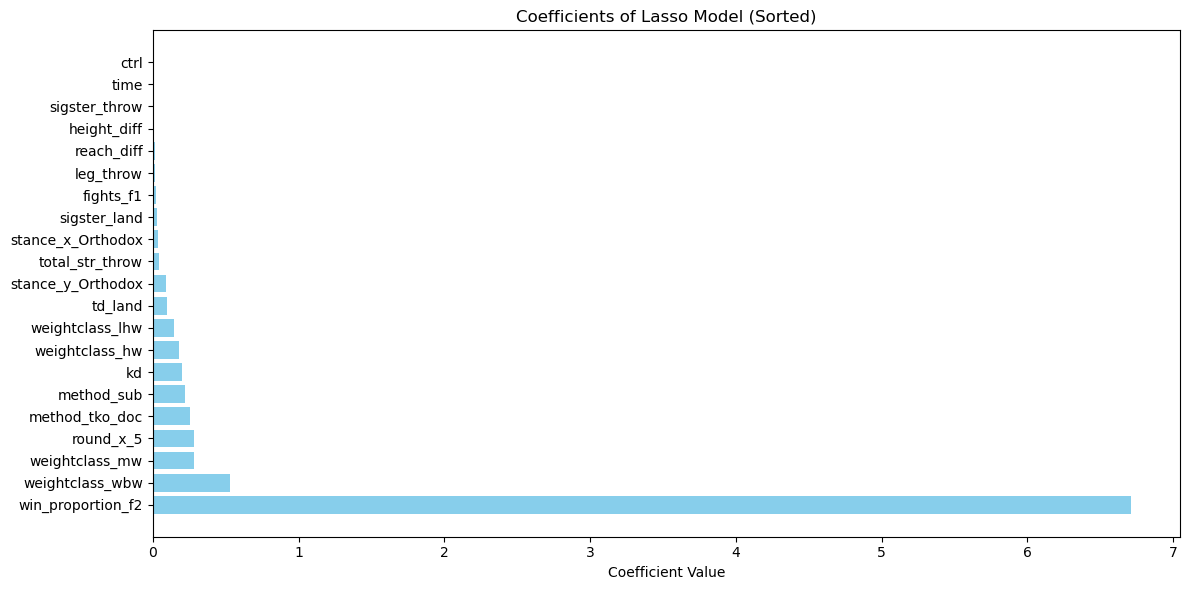

Test Accuracy: 0.8309953239812959


In [530]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def find_best_lasso_model(df):
    # Create Logistic Regression model with L1 regularization (Lasso)
    y= df['outcome'] #Outcome = 1 means figher 1 won, Outcome = 2 means fighter 2 won
    X = df.loc[:, df.columns != 'outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
    
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

    # Define parameter grid for alpha
    param_grid = {
        'C': np.logspace(-3, 3, 7)  # C is the inverse of alpha
    }

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='accuracy',
                               verbose=1, n_jobs=-1)

    # Fit GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get best alpha
    best_alpha = grid_search.best_params_['C']

    # Create and return best Lasso model with the best alpha
    best_lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=best_alpha, random_state=42)
    
    # Train the best model on the full training set
    best_lasso_model.fit(X_train, y_train)
    
    feature_names=X.columns
    # Get feature importance for Logistic Regression
    lasso_coefficients = best_lasso_model.coef_[0]
    lasso_feature_names =feature_names

    # Filter coefficients and feature names where coefficient is greater than zero
    selected_coefficients = [coef for coef, name in zip(lasso_coefficients, lasso_feature_names) if coef > 0]
    selected_feature_names = [name for coef, name in zip(lasso_coefficients, lasso_feature_names) if coef > 0]
    
    X_train_selected = X_train[selected_feature_names]
    X_test_selected = X_test[selected_feature_names]
    
    # Make predictions on test set
    y_test_pred = best_lasso_model.predict(X_test)
    
    # Calculate accuracy for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print classification report for test set
    print("Classification Report for Test Set:")
    print(classification_report(y_test, y_test_pred))

    #Display sorted features
    # Sort the coefficients and feature names based on coefficients
    sorted_indices = np.argsort(selected_coefficients)[::-1]
    sorted_coefficients = [selected_coefficients[i] for i in sorted_indices]
    sorted_feature_names = [selected_feature_names[i] for i in sorted_indices]
    
    # Plot the coefficients
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title('Coefficients of Lasso Model (Sorted)')
    
    plt.tight_layout()
    plt.show()

    cleaned_features_selected=df[selected_feature_names+["outcome"]]
    return test_accuracy, cleaned_features_selected

# Example usage
test_accuracy, cleaned_features_selected = find_best_lasso_model(cleaned_features_V2)
print("Test Accuracy:", test_accuracy)

In [531]:
cleaned_features_selected.columns

Index(['time', 'fights_f1', 'win_proportion_f2', 'height_diff', 'reach_diff',
       'kd', 'ctrl', 'sigster_throw', 'sigster_land', 'total_str_throw',
       'td_land', 'leg_throw', 'weightclass_hw', 'weightclass_lhw',
       'weightclass_mw', 'weightclass_wbw', 'method_sub', 'method_tko_doc',
       'round_x_5', 'stance_x_Orthodox', 'stance_y_Orthodox', 'outcome'],
      dtype='object')

In [532]:
df=cleaned_features_selected.copy()

In [533]:
#Creates y and X variables
y= df['outcome'] #Outcome = 1 means figher 1 won, Outcome = 2 means fighter 2 won
X = df.loc[:, df.columns != 'outcome']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

#Lasso made the accuracy worse, so going back to other variables

In [534]:
cleaned_features_selected.to_csv('./clean/features_with_fight_stats_lasso.csv')

In [535]:
cleaned_features_V2.to_csv('./clean/features_with_fight_stats.csv')